In [99]:
import os
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data = pd.read_csv('LoanStats_2017Q1.csv',low_memory=False)


In [101]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [102]:
len(data.columns)

145

In [103]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96781 entries, 0 to 96780
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 107.1+ MB


In [104]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,16000.0,16000.0,16000.0,60 months,12.74%,361.93,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,11875.0,11875.0,11875.0,36 months,11.44%,391.26,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26000.0,26000.0,26000.0,60 months,15.99%,632.14,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000.0,35000.0,35000.0,36 months,19.99%,1300.55,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
data['loan_status'].value_counts()

Current               49779
Fully Paid            34459
Charged Off           10240
Late (31-120 days)     1534
In Grace Period         558
Late (16-30 days)       207
Default                   2
Name: loan_status, dtype: int64

In [106]:
data = data.loc[data['loan_status'].isin(['Fully Paid','Charged Off'])]

In [107]:
data['loan_status'].value_counts(normalize=False, dropna=False)

Fully Paid     34459
Charged Off    10240
Name: loan_status, dtype: int64

In [108]:
data['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.770912
Charged Off    0.229088
Name: loan_status, dtype: float64

In [109]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    miss_val = data.isnull().sum()
    # Percentage of missing values
    miss_val_percent = 100 * data.isnull().sum() / len(df)
    miss_val_type = data.dtypes
    # Make a table with the results
    miss_val_table = pd.concat([miss_val, miss_val_percent, miss_val_type], axis=1)
        
     # Rename the columns
    miss_val_table_rename_columns = miss_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'data type'})
        
    # Sort the table by percentage of missing descending
    miss_val_table_rename_columns = miss_val_table_rename_columns[ miss_val_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " +str( data.shape[1] )+ " columns.\n" "There are " +str (miss_val_table_rename_columns.shape[0]) + " columns that have missing values.")
    #no of rows and column in this table
    print(miss_val_table_rename_columns.shape)    
    # Return the dataframe with missing information
    return miss_val_table_rename_columns

In [110]:
missing_values_table(data)

Your selected dataframe has 145 columns.
There are 60 columns that have missing values.
(60, 3)


,Missing Values,% of Total Values,data type
id,44699,100.0,object
url,44699,100.0,float64
next_pymnt_d,44699,100.0,object
desc,44699,100.0,float64
member_id,44699,100.0,float64
sec_app_mths_since_last_major_derog,44565,99.7,float64
orig_projected_additional_accrued_interest,44503,99.6,float64
hardship_payoff_balance_amount,44359,99.2,float64
hardship_start_date,44359,99.2,object
hardship_type,44359,99.2,object


In [111]:
#no of rows and columns in original dataset
data.shape

(44699, 145)

In [112]:
missing_frac = data.isnull().mean()
drop_list = sorted(missing_frac[missing_frac > 0.50].index)

In [113]:
print(drop_list)

['annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'member_id', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status', 'settlement_term', 'url', 'verification_status_joint']


In [114]:
len(drop_list)

43

In [115]:
data.drop(labels=drop_list, axis=1, inplace=True)

In [116]:
data.shape

(44699, 102)

In [117]:


print(sorted(data.columns))



['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_

In [118]:
drop_list1 = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d',  'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim']

In [119]:
data.drop(labels=drop_list1, axis=1, inplace=True)

In [120]:
print(sorted(data.columns))

['addr_state', 'all_util', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'mths_since_last_delinq', 'mths_since_rcnt_il', 'open_acc', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'total_bal_il', 'total_cu_tl', 'verification_status', 'zip_code']


In [121]:
len(data.columns)

46

In [125]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'loan_status', height=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()

In [127]:
data['loan_amnt'].describe()

count    44699.000000
mean     14537.067943
std       9317.870248
min       1000.000000
25%       7200.000000
50%      12000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

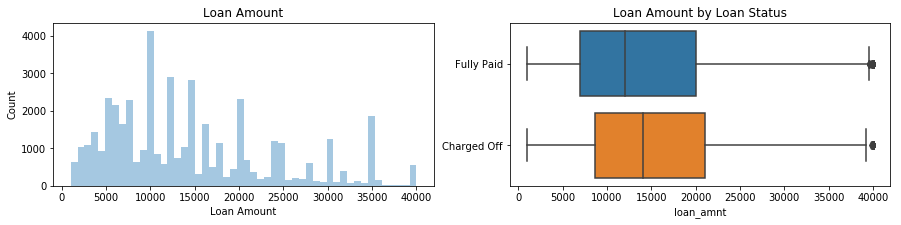

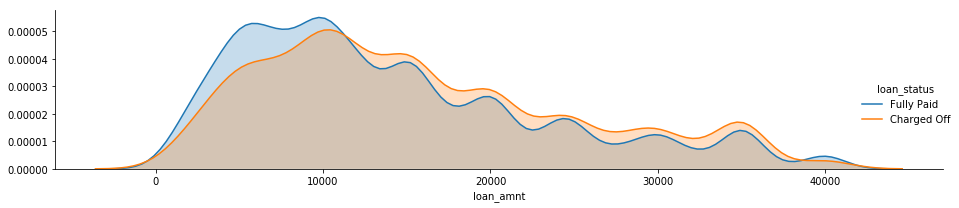

In [128]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)


In [95]:
data['term'].sample(5)

44316     36 months
16221     36 months
60878     60 months
18250     36 months
2156      36 months
Name: term, dtype: object

In [129]:
data['term'].value_counts(dropna=False)

 36 months    34822
 60 months     9877
Name: term, dtype: int64

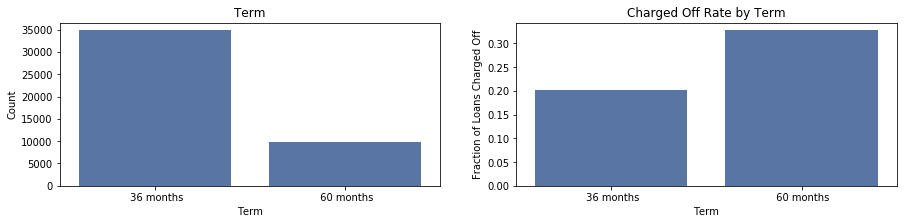

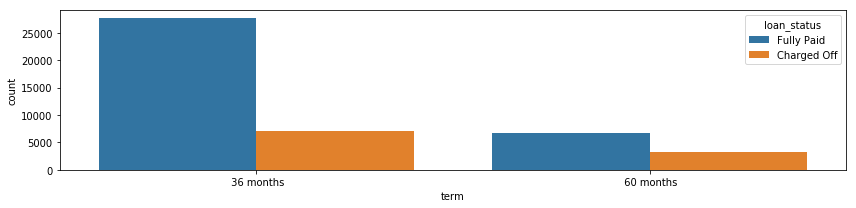

In [130]:

plot_var('term', 'Term', continuous=False)

In [131]:
        Charged_Off_rates = data.groupby('term')['loan_status'].value_counts(normalize=True)[:,'Charged Off']

In [132]:
print(Charged_Off_rates)

term
 36 months    0.201338
 60 months    0.326921
Name: loan_status, dtype: float64


In [133]:
data['term'].value_counts(normalize=True)


 36 months    0.779033
 60 months    0.220967
Name: term, dtype: float64

In [238]:
data['int_rate'].describe()

count       44699
unique         36
top        12.74%
freq         3730
Name: int_rate, dtype: object

In [239]:
data['int_rate'] = data.int_rate.map( lambda x: float(str(x)[3]))

ValueError: could not convert string to float: '.'

TypeError: unsupported operand type(s) for /: 'str' and 'int'

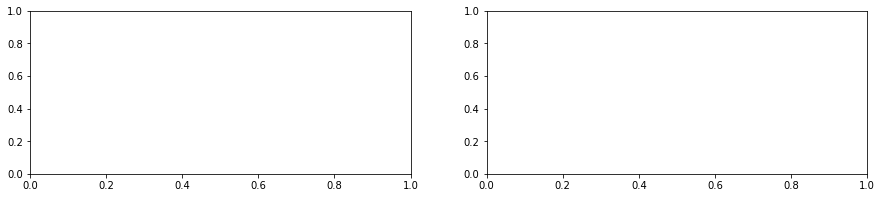

In [137]:
plot_var('int_rate', 'Interest Rate', continuous=True)


In [138]:
data['installment'].describe()

count    44699.000000
mean       452.562509
std        290.398032
min         30.120000
25%        239.210000
50%        372.210000
75%        607.820000
max       1715.420000
Name: installment, dtype: float64

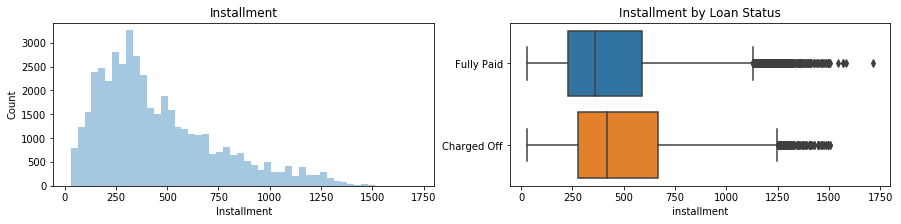

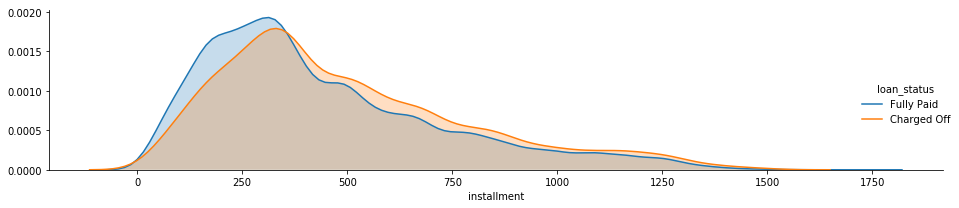

In [139]:
plot_var('installment', 'Installment', continuous=True)

In [140]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,10240.0,495.824440,297.327275,30.99,277.29,418.74,665.8225,1504.85
Fully Paid,34459.0,439.706588,287.057275,30.12,230.61,361.38,590.5650,1715.42


In [141]:
sorted(data['grade'].unique())


['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [142]:
print(sorted(data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


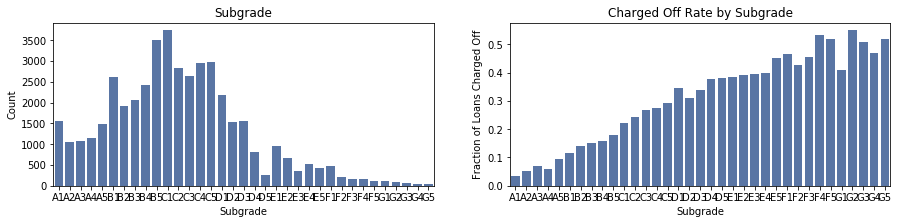

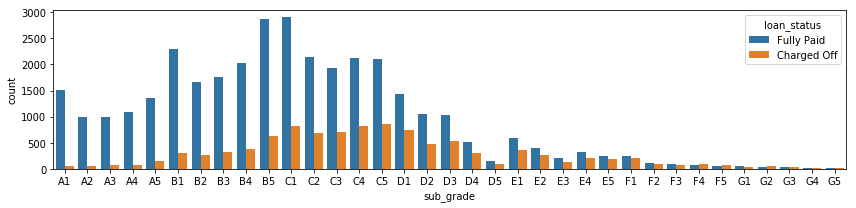

In [143]:
plot_var('sub_grade','Subgrade',continuous=False)

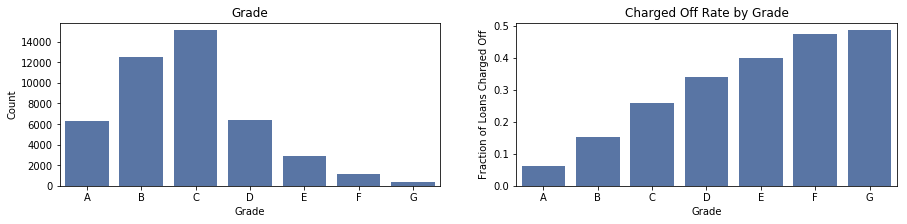

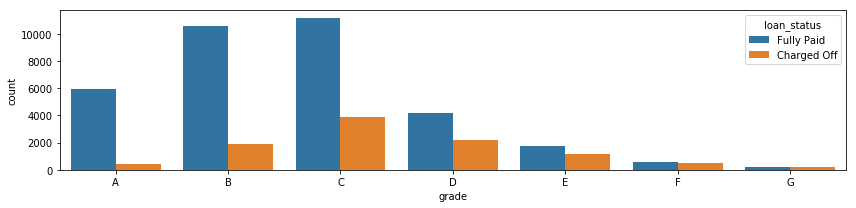

In [144]:
plot_var('grade','Grade',continuous=False)


In [145]:
Grade=['grade']

In [146]:
data.drop(labels=Grade, axis=1, inplace=True)

In [147]:
data['emp_title'].describe()

count       41570
unique      19013
top       Teacher
freq          804
Name: emp_title, dtype: object

In [148]:
data.drop(labels='emp_title', axis=1, inplace=True)

In [149]:
data['emp_length'].value_counts(dropna=False).sort_index()

1 year        3020
10+ years    15092
2 years       4308
3 years       3788
4 years       2663
5 years       2874
6 years       1991
7 years       1517
8 years       1452
9 years       1667
< 1 year      3247
NaN           3080
Name: emp_length, dtype: int64

In [210]:
data['emp_length'].replace('10+ years', '10 +years', inplace=True)

In [211]:
data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [212]:
data['emp_length'].value_counts(dropna=False).sort_index()

0 years       3247
1 year        3020
10 +years    15092
2 years       4308
3 years       3788
4 years       2663
5 years       2874
6 years       1991
7 years       1517
8 years       1452
9 years       1667
NaN           3080
Name: emp_length, dtype: int64

In [213]:
data.emp_length.map( lambda x: str(x).split()[0]).value_counts(dropna=True).sort_index()

0       3247
1       3020
10     15092
2       4308
3       3788
4       2663
5       2874
6       1991
7       1517
8       1452
9       1667
nan     3080
Name: emp_length, dtype: int64

In [214]:
data['emp_length'] = data.emp_length.map( lambda x: float(str(x).split()[0]))

In [215]:
data['emp_length'].sample(5)

92393     1.0
96302     1.0
74654    10.0
56984     4.0
25594     6.0
Name: emp_length, dtype: float64

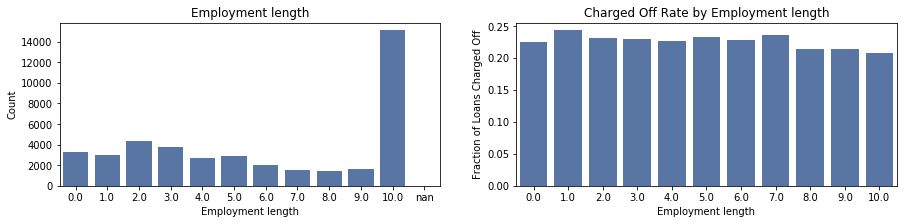

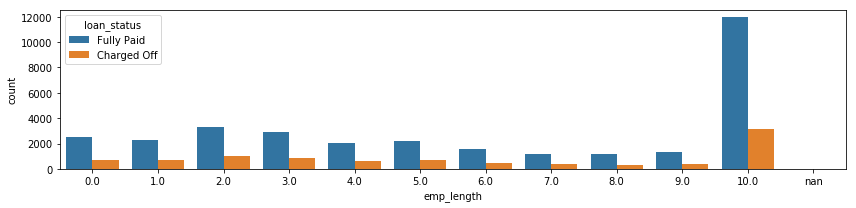

In [216]:
plot_var('emp_length', 'Employment length', continuous=False)

In [217]:
data['home_ownership'].value_counts()

MORTGAGE    22588
RENT        16745
OWN          5179
ANY           186
NONE            1
Name: home_ownership, dtype: int64

In [218]:
data['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace=True)

In [219]:
data['home_ownership'].value_counts()

MORTGAGE    22588
RENT        16745
OWN          5179
OTHER         187
Name: home_ownership, dtype: int64

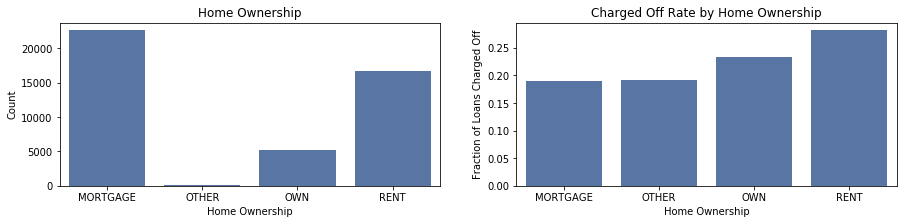

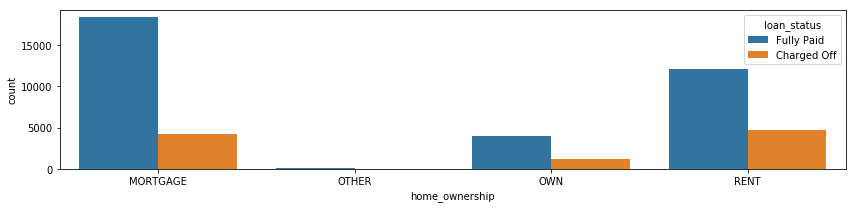

In [220]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [221]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.189393
OTHER       0.192513
OWN         0.234215
RENT        0.281457
Name: loan_status, dtype: float64

In [222]:
data['annual_inc'].describe()

count    44699.000000
mean         4.837498
std          0.248419
min          0.000000
25%          4.695928
50%          4.838855
75%          4.986776
max          6.978773
Name: annual_inc, dtype: float64

In [223]:
data['annual_inc'] = data['annual_inc'].apply(lambda x:np.log10(x+1))

In [224]:
data['annual_inc'].describe()

count    44699.000000
mean         0.765765
std          0.021498
min          0.000000
25%          0.755564
50%          0.766328
75%          0.777193
max          0.901936
Name: annual_inc, dtype: float64

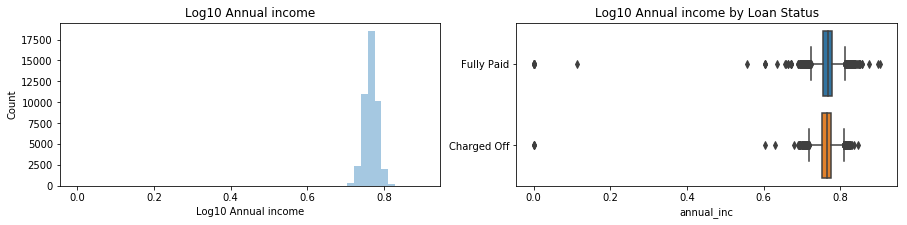

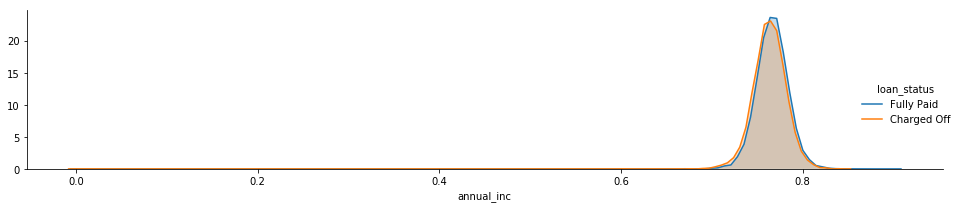

In [225]:
plot_var('annual_inc', 'Log10 Annual income', continuous=True)

In [226]:
data.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,10240.0,0.763447,0.022101,0.0,0.752296,0.764394,0.774827,0.844608
Fully Paid,34459.0,0.766455,0.021267,0.0,0.755797,0.766792,0.778152,0.901936


In [227]:
data['verification_status'].value_counts()

Source Verified    18418
Not Verified       13164
Verified           13117
Name: verification_status, dtype: int64

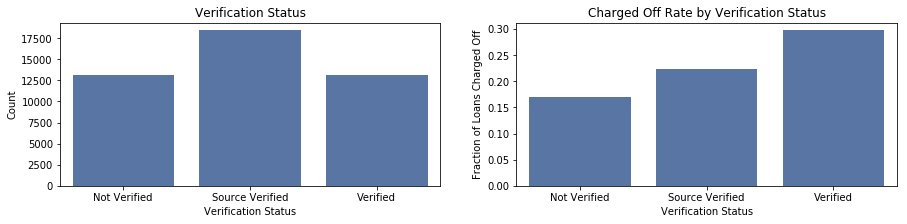

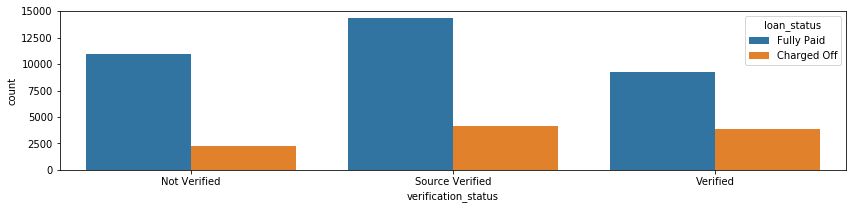

In [228]:
plot_var('verification_status', 'Verification Status', continuous=False)

In [229]:
data['purpose'].value_counts()

debt_consolidation    25722
credit_card            9044
home_improvement       3350
other                  2882
major_purchase         1005
medical                 649
car                     541
small_business          501
vacation                385
moving                  342
house                   242
renewable_energy         36
Name: purpose, dtype: int64

In [230]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)

purpose
small_business        0.329341
medical               0.263482
other                 0.241846
vacation              0.241558
debt_consolidation    0.240339
house                 0.231405
moving                0.219298
major_purchase        0.214925
credit_card           0.202786
home_improvement      0.196418
renewable_energy      0.166667
car                   0.160813
Name: loan_status, dtype: float64

In [231]:
data['title'].describe()

count                  44699
unique                    12
top       Debt consolidation
freq                   25718
Name: title, dtype: object

In [232]:
data['title'].value_counts().head(10)

Debt consolidation         25718
Credit card refinancing     9049
Home improvement            3349
Other                       2882
Major purchase              1003
Medical expenses             649
Car financing                542
Business                     502
Vacation                     385
Moving and relocation        342
Name: title, dtype: int64

In [240]:
data['addr_state'].describe()

count     44699
unique       49
top          CA
freq       6579
Name: addr_state, dtype: object

In [242]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)

addr_state
AK    0.336735
MS    0.321569
NE    0.312796
OK    0.306878
DE    0.292683
LA    0.271457
NJ    0.266134
NY    0.261357
AR    0.253049
MI    0.252244
MO    0.248921
MD    0.246801
NM    0.245283
TX    0.244681
NV    0.244265
SD    0.240506
AL    0.239623
MT    0.238095
FL    0.236098
IN    0.233903
ND    0.232558
CA    0.231798
KY    0.231738
MA    0.230061
OH    0.227532
PA    0.222450
TN    0.221607
NC    0.220820
VA    0.219852
CT    0.217949
IL    0.217391
KS    0.210191
MN    0.208140
WI    0.205342
AZ    0.203055
UT    0.191601
CO    0.187612
HI    0.187251
NH    0.180258
WY    0.179775
ID    0.176871
GA    0.174981
WA    0.172635
SC    0.172084
RI    0.159624
OR    0.158940
VT    0.155556
ME    0.143885
DC    0.116279
Name: loan_status, dtype: float64

In [243]:
data['open_acc'].describe()

count    44699.000000
mean        11.825142
std          5.730141
min          1.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         72.000000
Name: open_acc, dtype: float64

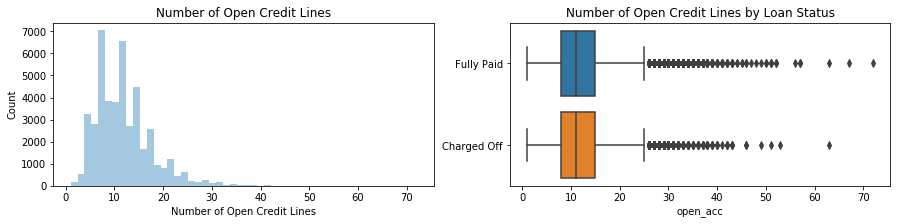

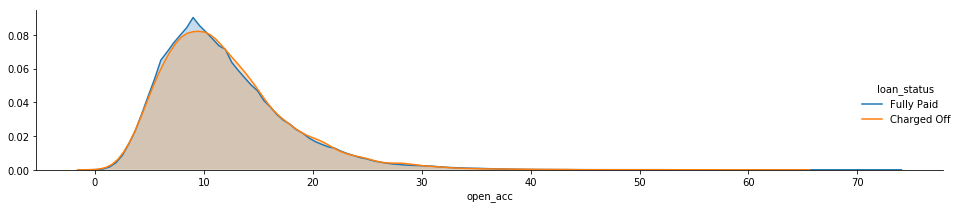

In [244]:
plot_var('open_acc', 'Number of Open Credit Lines', continuous=True)

In [245]:
data['pub_rec'].describe()

count    44699.000000
mean         0.268261
std          0.575078
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: pub_rec, dtype: float64

In [246]:

data['pub_rec'].value_counts().sort_values(ascending=False)

0.0    35097
1.0     7828
2.0     1159
3.0      615
Name: pub_rec, dtype: int64

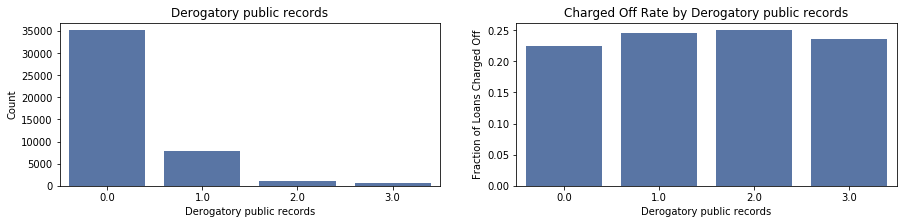

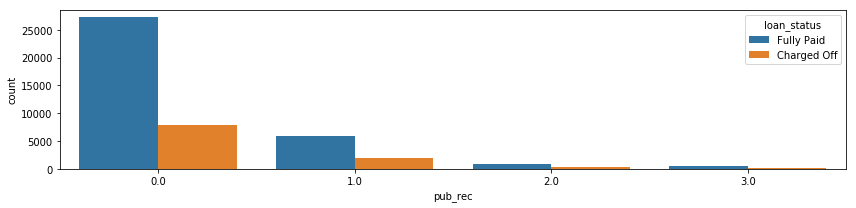

In [247]:
plot_var('pub_rec','Derogatory public records', continuous=False)

In [248]:
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,10240.0,0.286914,0.588247,0.0,0.0,0.0,0.0,3.0
Fully Paid,34459.0,0.262718,0.570997,0.0,0.0,0.0,0.0,3.0


In [249]:
data.pub_rec = data.pub_rec.map(lambda x: 3 if x >2.0 else x)

data['pub_rec'].value_counts().sort_values(ascending=False)



0.0    35097
1.0     7828
2.0     1159
3.0      615
Name: pub_rec, dtype: int64

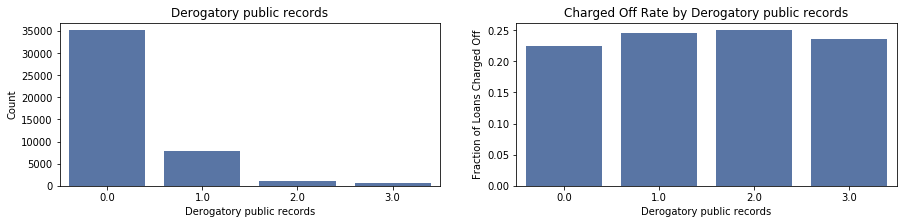

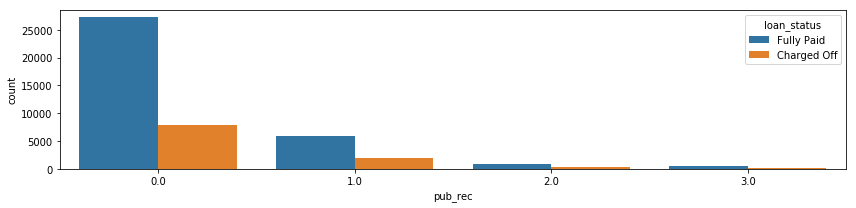

In [250]:
plot_var('pub_rec','Derogatory public records', continuous=False)

In [251]:
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,10240.0,0.286914,0.588247,0.0,0.0,0.0,0.0,3.0
Fully Paid,34459.0,0.262718,0.570997,0.0,0.0,0.0,0.0,3.0


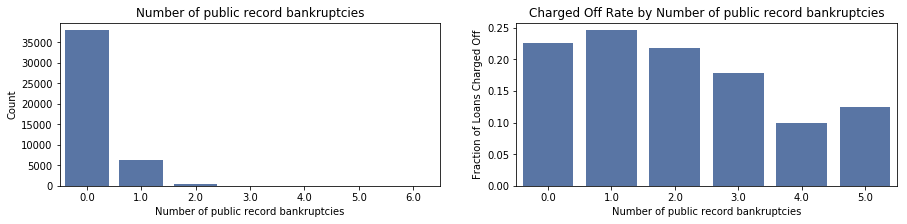

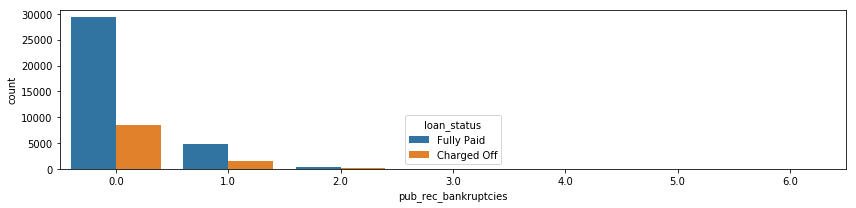

In [252]:
plot_var('pub_rec_bankruptcies', 'Number of public record bankruptcies', continuous=False)

In [253]:
data[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.706778
pub_rec_bankruptcies,0.706778,1.000000


In [254]:
data['revol_bal'].describe()

count    44699.000000
mean         3.998031
std          0.515354
min          0.000000
25%          3.778368
50%          4.044187
75%          4.289990
max          5.883826
Name: revol_bal, dtype: float64

In [255]:
data['revol_bal'] = data['revol_bal'].apply(lambda x:np.log10(x+1))

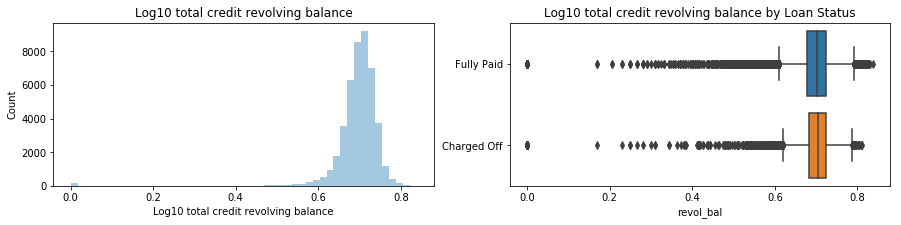

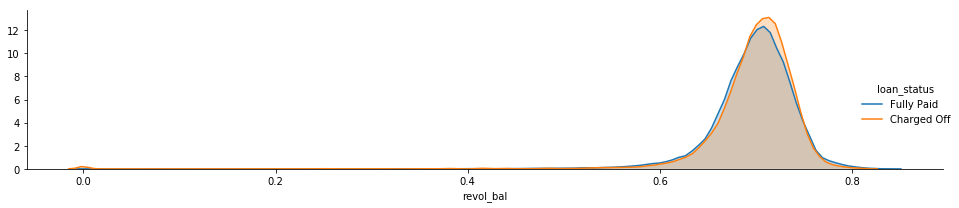

In [256]:
plot_var('revol_bal', 'Log10 total credit revolving balance', continuous=True)

In [257]:
data['revol_util'].describe()

count     44679
unique     1051
top          0%
freq        213
Name: revol_util, dtype: object

TypeError: unsupported operand type(s) for /: 'str' and 'int'

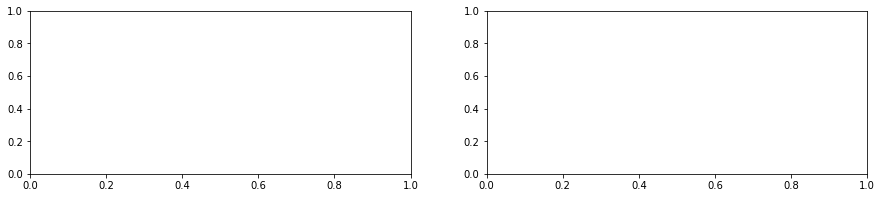

In [258]:
plot_var('revol_util', 'Revolving line utilization rate', continuous=True)

In [ ]:
data.groupby('loan_status')['revol_util'].describe()

In [259]:
data['total_acc'].describe()

count    44699.000000
mean        24.652274
std         12.105899
min          2.000000
25%         16.000000
50%         23.000000
75%         31.000000
max        144.000000
Name: total_acc, dtype: float64

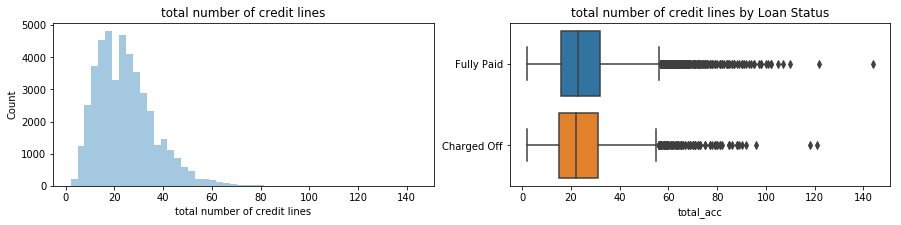

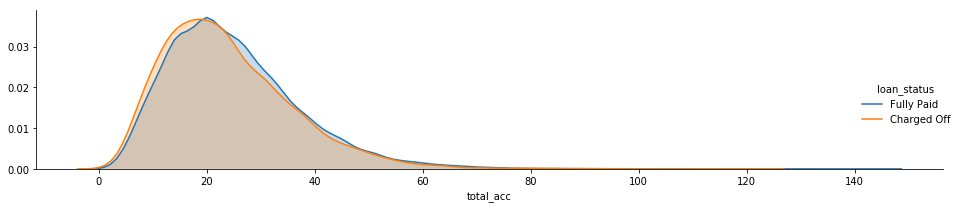

In [260]:
plot_var('total_acc', 'total number of credit lines', continuous=True)

In [261]:
data['initial_list_status'].value_counts()

w    30630
f    14069
Name: initial_list_status, dtype: int64

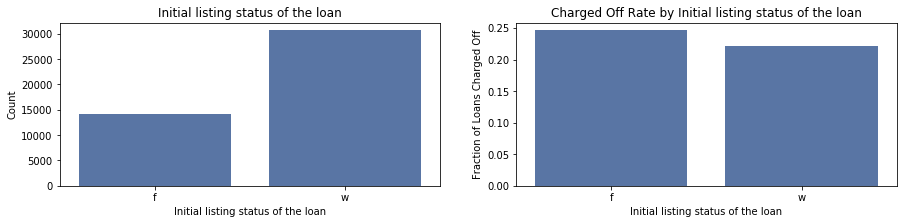

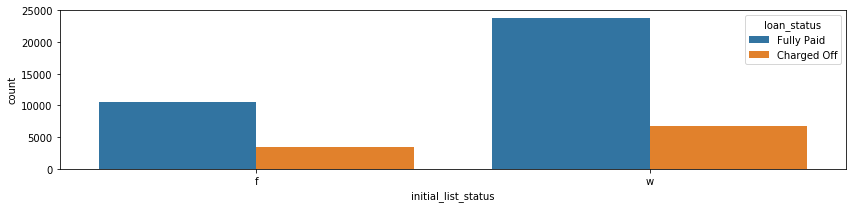

In [262]:
plot_var('initial_list_status','Initial listing status of the loan', continuous=False)

In [265]:
#data['policy_code'].value_counts()

In [266]:
#data.drop(labels='policy_code', axis=1, inplace=True)

In [267]:
data['application_type'].value_counts()

Individual    42889
Joint App      1810
Name: application_type, dtype: int64

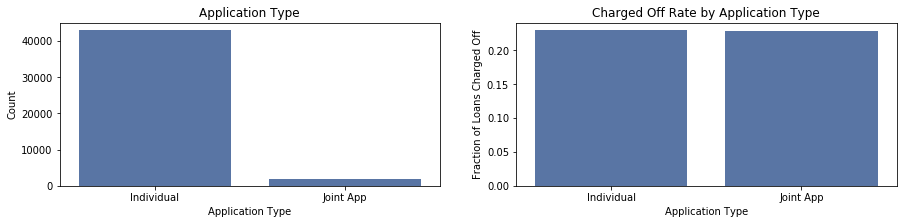

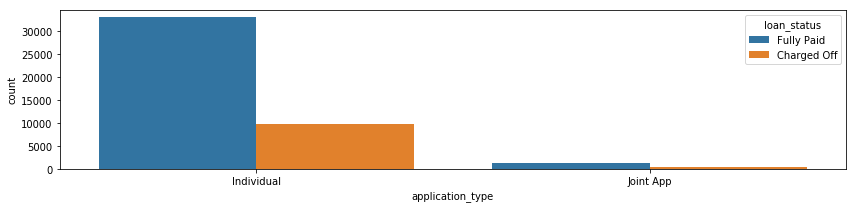

In [268]:
plot_var('application_type', 'Application Type', continuous=False)

In [269]:
data['mo_sin_old_il_acct'].describe()

count    43635.000000
mean       124.974470
std         52.578255
min          0.000000
25%         98.000000
50%        129.000000
75%        152.000000
max        665.000000
Name: mo_sin_old_il_acct, dtype: float64

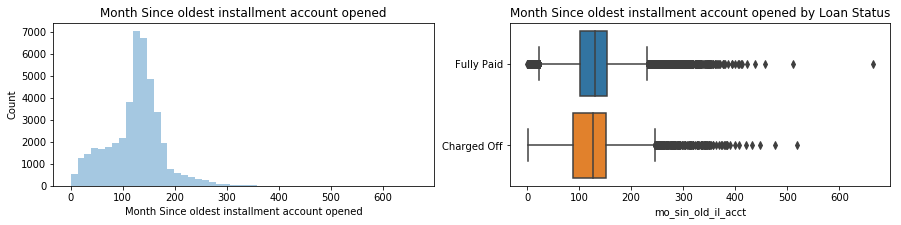

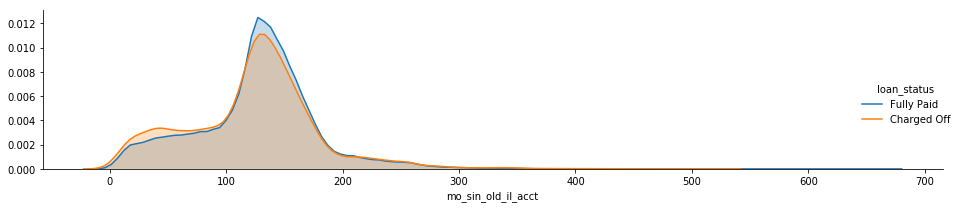

In [270]:
plot_var('mo_sin_old_il_acct', 'Month Since oldest installment account opened', continuous=True)

In [271]:
data['mo_sin_old_rev_tl_op'].describe()

count    44699.000000
mean       181.155731
std         96.550875
min         10.000000
25%        118.000000
50%        163.000000
75%        231.000000
max        781.000000
Name: mo_sin_old_rev_tl_op, dtype: float64

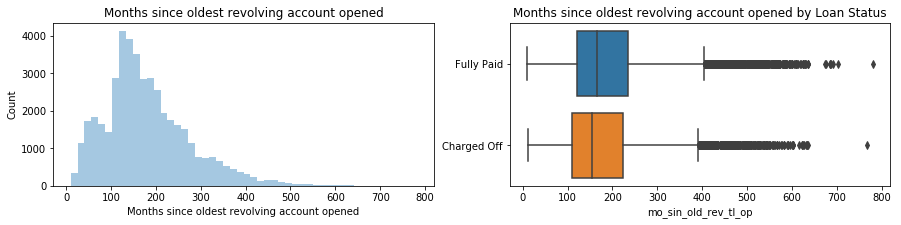

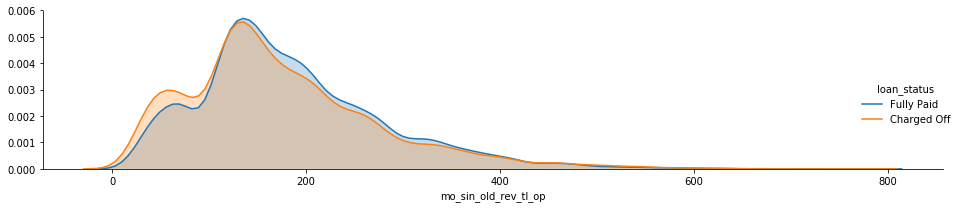

In [272]:
plot_var('mo_sin_old_rev_tl_op', 'Months since oldest revolving account opened', continuous=True)

In [273]:
data['mort_acc'].describe()

count    44699.000000
mean         1.536254
std          1.711037
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          6.000000
Name: mort_acc, dtype: float64

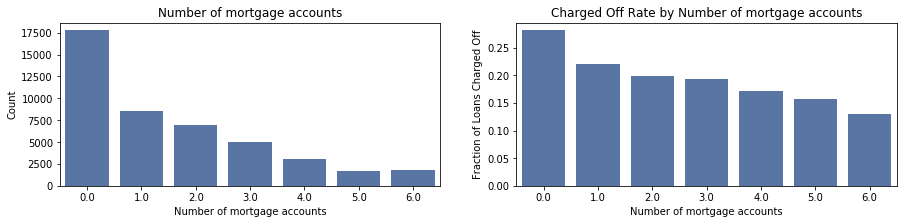

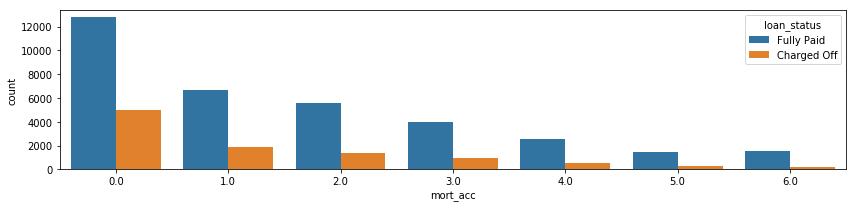

In [274]:
plot_var('mort_acc', 'Number of mortgage accounts', continuous=False)

In [275]:
data.mort_acc = data.mort_acc.map(lambda x: 6.0 if x > 6.0 else x)

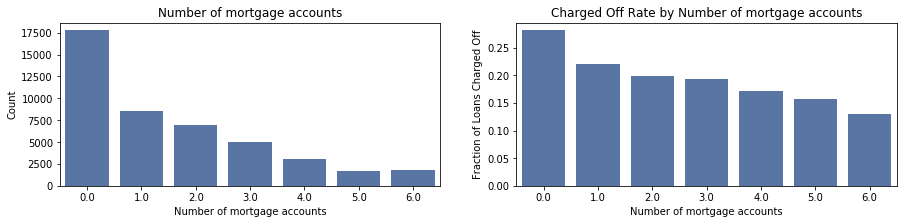

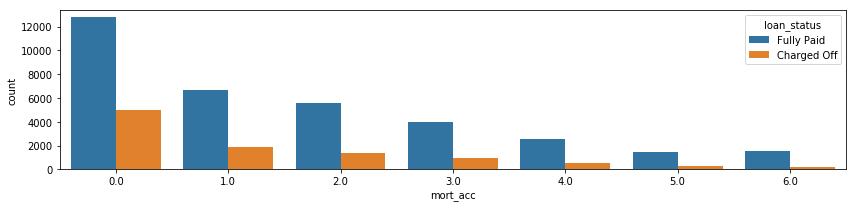

In [276]:
plot_var('mort_acc', 'Number of mortgage accounts', continuous=False)

In [277]:
data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,10240.0,1.205078,1.548618,0.0,0.0,1.0,2.0,6.0
Fully Paid,34459.0,1.634667,1.744354,0.0,0.0,1.0,3.0,6.0
